## Introduction

### Overview of the Cleveland Heart Disease Dataset
The Cleveland Heart Disease dataset is a collection of data on various attributes related to heart health, including age, sex, chest pain type, cholesterol levels, etc. The dataset is used to predict the presence of heart disease in patients.

### Objectives of the Exploratory Data Analysis (EDA)
The objectives of this EDA are to:

- **Identify patterns and relationships:** Explore the dataset to discover meaningful patterns and relationships between features and the target variable (presence of heart disease).
- **Prepare the dataset:** Clean and preprocess the data to ensure it is suitable for predictive modeling.
- **Understand feature importance:** Determine which features are most influential in predicting heart disease.
- **Gain insights:** Extract valuable insights into the factors that contribute to heart disease.


# DATA PRE-PROCESSING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [12]:
df = pd.read_csv(r"C:\Users\aakan\OneDrive\Desktop\AIDTM\trim 4\ML\DATASET FOR ML ASSGN\Heart_disease_cleveland_new.csv")  # Update the path accordingly
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [4]:
print(df.isnull().sum())

df = df.dropna()

df.fillna(df.mean(), inplace=True) 
df.fillna(df.mode().iloc[0], inplace=True)  

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [11]:
# Descriptive Statistics

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,2.158416,0.960126,0.0,2.0,2.0,3.0,3.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Visualization

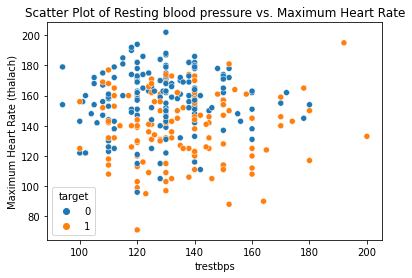

In [17]:
#1. Scatter Plot- Maximum Heart Rate
#trestbps stands for Resting blood pressure during test
sns.scatterplot(data=df, x='trestbps', y='thalach', hue='target')
plt.title('Scatter Plot of Resting blood pressure vs. Maximum Heart Rate')
plt.xlabel('trestbps')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()

Analysis: The scatter plot shows the relationship between resting blood pressure (trestbps) and maximum heart rate (thalach).

Interpretation: The scatter plot shows that higher resting blood pressure may correspond to a lower maximum heart rate, hinting at reduced cardiovascular efficiency. Heart disease patients tend to cluster in certain areas, indicating that specific blood pressure and heart rate combinations could signal higher heart disease risk.

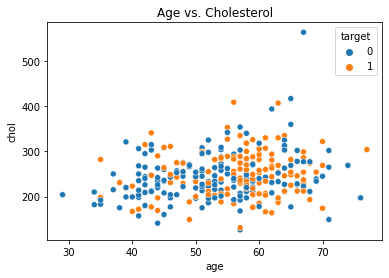

In [16]:
#1.2 Scatter plot for age vs. cholesterol
sns.scatterplot(data=df, x='age', y='chol', hue='target')
plt.title('Age vs. Cholesterol')
plt.show()


Analysis: The scatter plot shows the cholesterol level across all ages.

Interpretation: The scatter plot indicates that cholesterol levels vary widely across all ages, with no strong correlation between age and cholesterol. However, certain age groups might show a higher prevalence of elevated cholesterol, potentially increasing their heart disease risk.

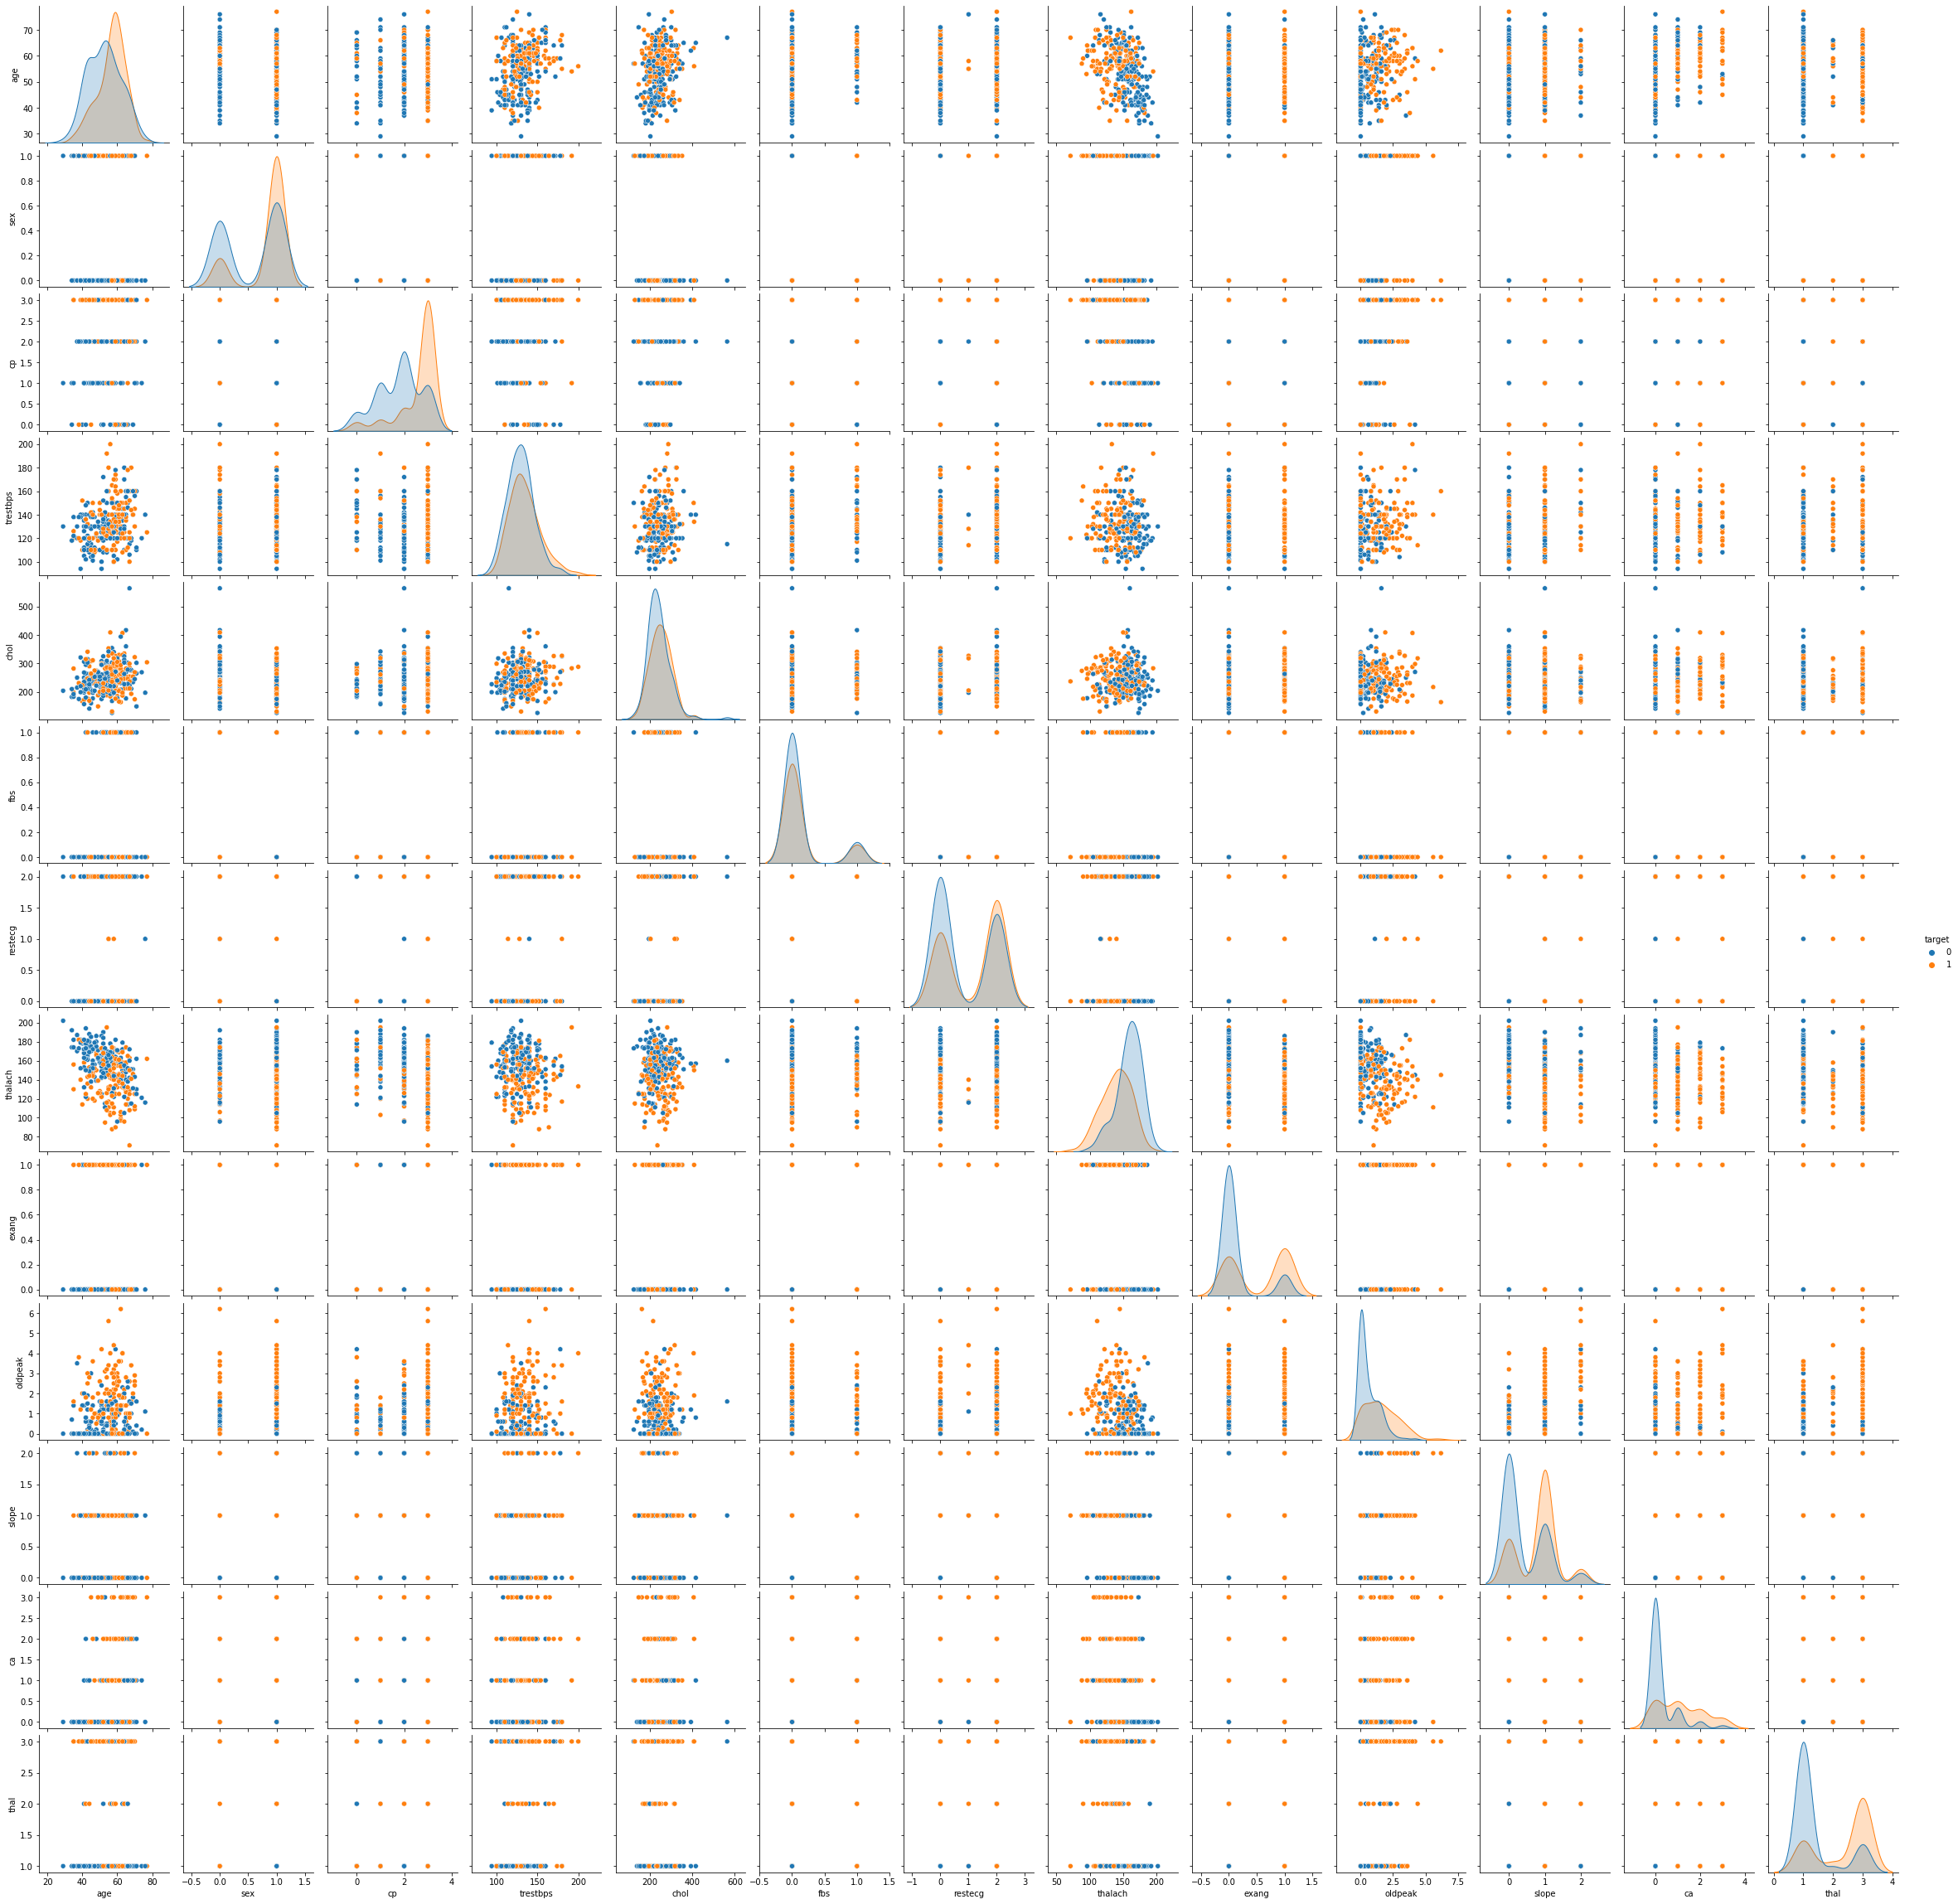

In [19]:
#2. Pair plot for all numerical features
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for all numerical features with hue as the target variable
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()


Analysis: Pair plots reveal relationships between all numerical variables, showing possible correlations.

Interpretations: The pair plot reveals relationships between numerical features, highlighting patterns like the inverse relationship between age and maximum heart rate. The `hue` parameter (e.g., heart disease presence) further distinguishes these patterns, showing that certain feature combinations, such as high cholesterol with low heart rate, are more common in heart disease patients. This helps identify which features are more predictive for heart disease.

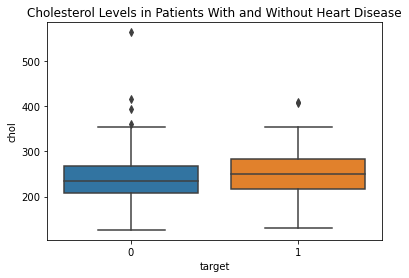

In [20]:
#3. Box Plot- cholesterol levels in patients with and without heart disease
sns.boxplot(data=df, x='target', y='chol')
plt.title('Cholesterol Levels in Patients With and Without Heart Disease')
plt.show()


Analysis: Box plot for visualizing the cholesterol level in patients with heart disease(0) and without heart disease(1).
    
Interpretation:We used a box plot to compare cholesterol levels between patients with and without heart disease because it effectively shows the distribution, median, and spread of the data. This allows us to easily see differences in cholesterol levels between the two groups and identify any significant variations or outliers, helping to assess cholesterol's role as a potential risk factor.

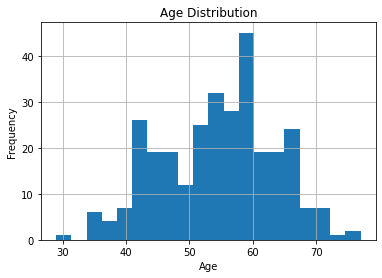

In [22]:
#4.1 Histogram- age, cholesterol, maximum heart rate
# Histogram for age
df['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Analysis: The histogram shows the distribution of patients' ages in the dataset. The data is spread across a range of ages, with the majority of patients being middle-aged, typically between 40 and 60 years old.
    
Interpretation: We used a histogram to visualize the age distribution, which clearly shows how patient ages are spread across the dataset. It highlights that most patients are middle-aged to older adults, reflecting the higher risk of heart disease in these age groups. The histogram helps us quickly understand the age demographics, which is crucial for analyzing age-related heart disease risk.

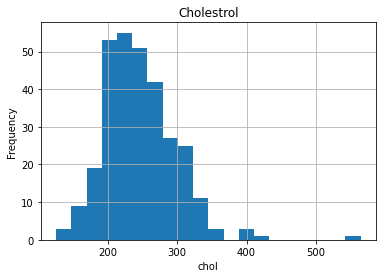

In [24]:
#4.2 Histogram for cholestrol
df['chol'].hist(bins=20)
plt.title('Cholestrol')
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.show()


Analysis: Histogram shows the distribution of cholesterol levels in the dataset, with values spread across a range.
    
Interpretation:
The histogram shows the distribution of cholesterol levels in the dataset, with values spread across a range. The plot indicates that most patients have cholesterol levels clustered around a central range, with fewer patients having very high or very low cholesterol levels.
We used a histogram to visualize cholesterol distribution, which helps us see the most common cholesterol levels among patients. This is crucial for understanding how cholesterol levels are distributed in the population and identifying any trends that might be associated with an increased risk of heart disease. The histogram reveals whether certain cholesterol ranges are more prevalent, aiding in the analysis of cholesterol as a potential risk factor.

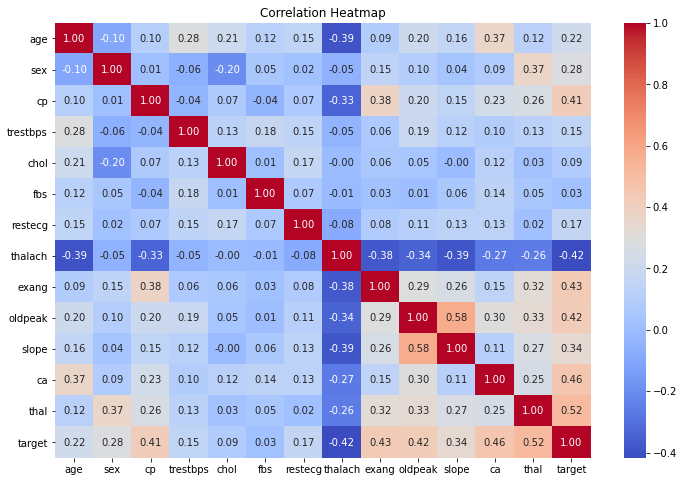

In [25]:
#5.Correlation Heatmap- Identify the strength and direction of relationships between features.
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Analysis: Heatmap showing the relationships between different factors of the dataset.
    
Interpretation: The heatmap shows the correlation between different factors of the dataset. It shows positive or negative correlation between different factors. 
for example, Strong Positive Correlation between thalach and target, Strong Negative Correlation between exang and thalach, etc.

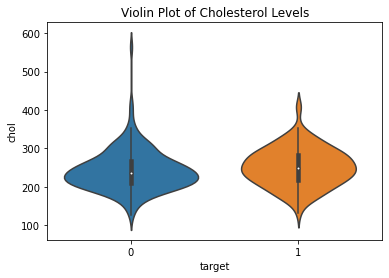

In [26]:
#6. Violin plot for cholesterol across target categories
sns.violinplot(data=df, x='target', y='chol')
plt.title('Violin Plot of Cholesterol Levels')
plt.show()


Analysis: Violin plot of Cholesterol Level in 2 different categories. I.e., People with heart disease (0) and people without heart disease (1).

Interpretation: The violin plot shows the distribution of cholesterol levels (`chol`) for each category of the target variable (`target`). The width of the "violin" at different cholesterol levels indicates the density of data points. Wider sections represent more patients with those cholesterol levels. The plot helps compare the cholesterol distributions across different target categories, revealing variations or similarities in cholesterol levels within each group.

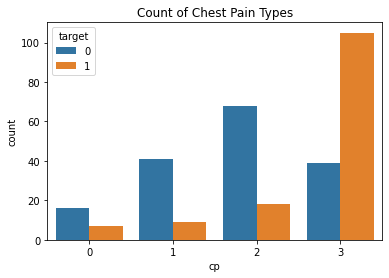

In [27]:
#7. Count plot for types of chest pain
sns.countplot(data=df, x='cp', hue='target')
plt.title('Count of Chest Pain Types')
plt.show()


Analysis: The count plot shows the frequency of each chest pain type (`cp`) and how they distribute between patients with and without heart disease (`target`).

Interpretation: The count plot shows the frequency of different chest pain types (`cp`), separated by the target variable (`target`). It highlights how common each chest pain type is and how they distribute between patients with and without heart disease. This helps identify if certain chest pain types are more associated with heart disease.

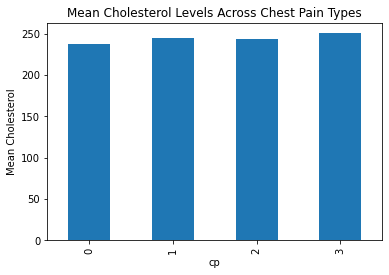

In [28]:
#8. Bar plot for mean cholesterol levels across chest pain types
df.groupby('cp')['chol'].mean().plot(kind='bar')
plt.title('Mean Cholesterol Levels Across Chest Pain Types')
plt.ylabel('Mean Cholesterol')
plt.show()


Analysis: Bar plot showing the mean of the cholesterol  level across chest pain types

Interpretation : This plot helps compare the average cholesterol levels among patients with different types of chest pain. By examining the bars, you can identify if certain chest pain types are associated with higher or lower average cholesterol levels, potentially indicating a link between cholesterol levels and the type of chest pain experienced by patients.


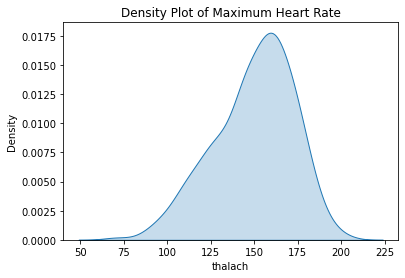

In [29]:
#9.Density plot for maximum heart rate
sns.kdeplot(df['thalach'], shade=True)
plt.title('Density Plot of Maximum Heart Rate')
plt.show()


Analysis: The density plot visualizes the distribution of maximum heart rate (`thalach`) values in the dataset, showing how frequently different heart rate levels occur.

Interpretation: The plot helps identify the most common maximum heart rate levels among patients. Peaks in the curve indicate where the data is concentrated, revealing the heart rate ranges that are most prevalent in the population. This can be useful for understanding typical heart rate patterns and detecting any unusual deviations.

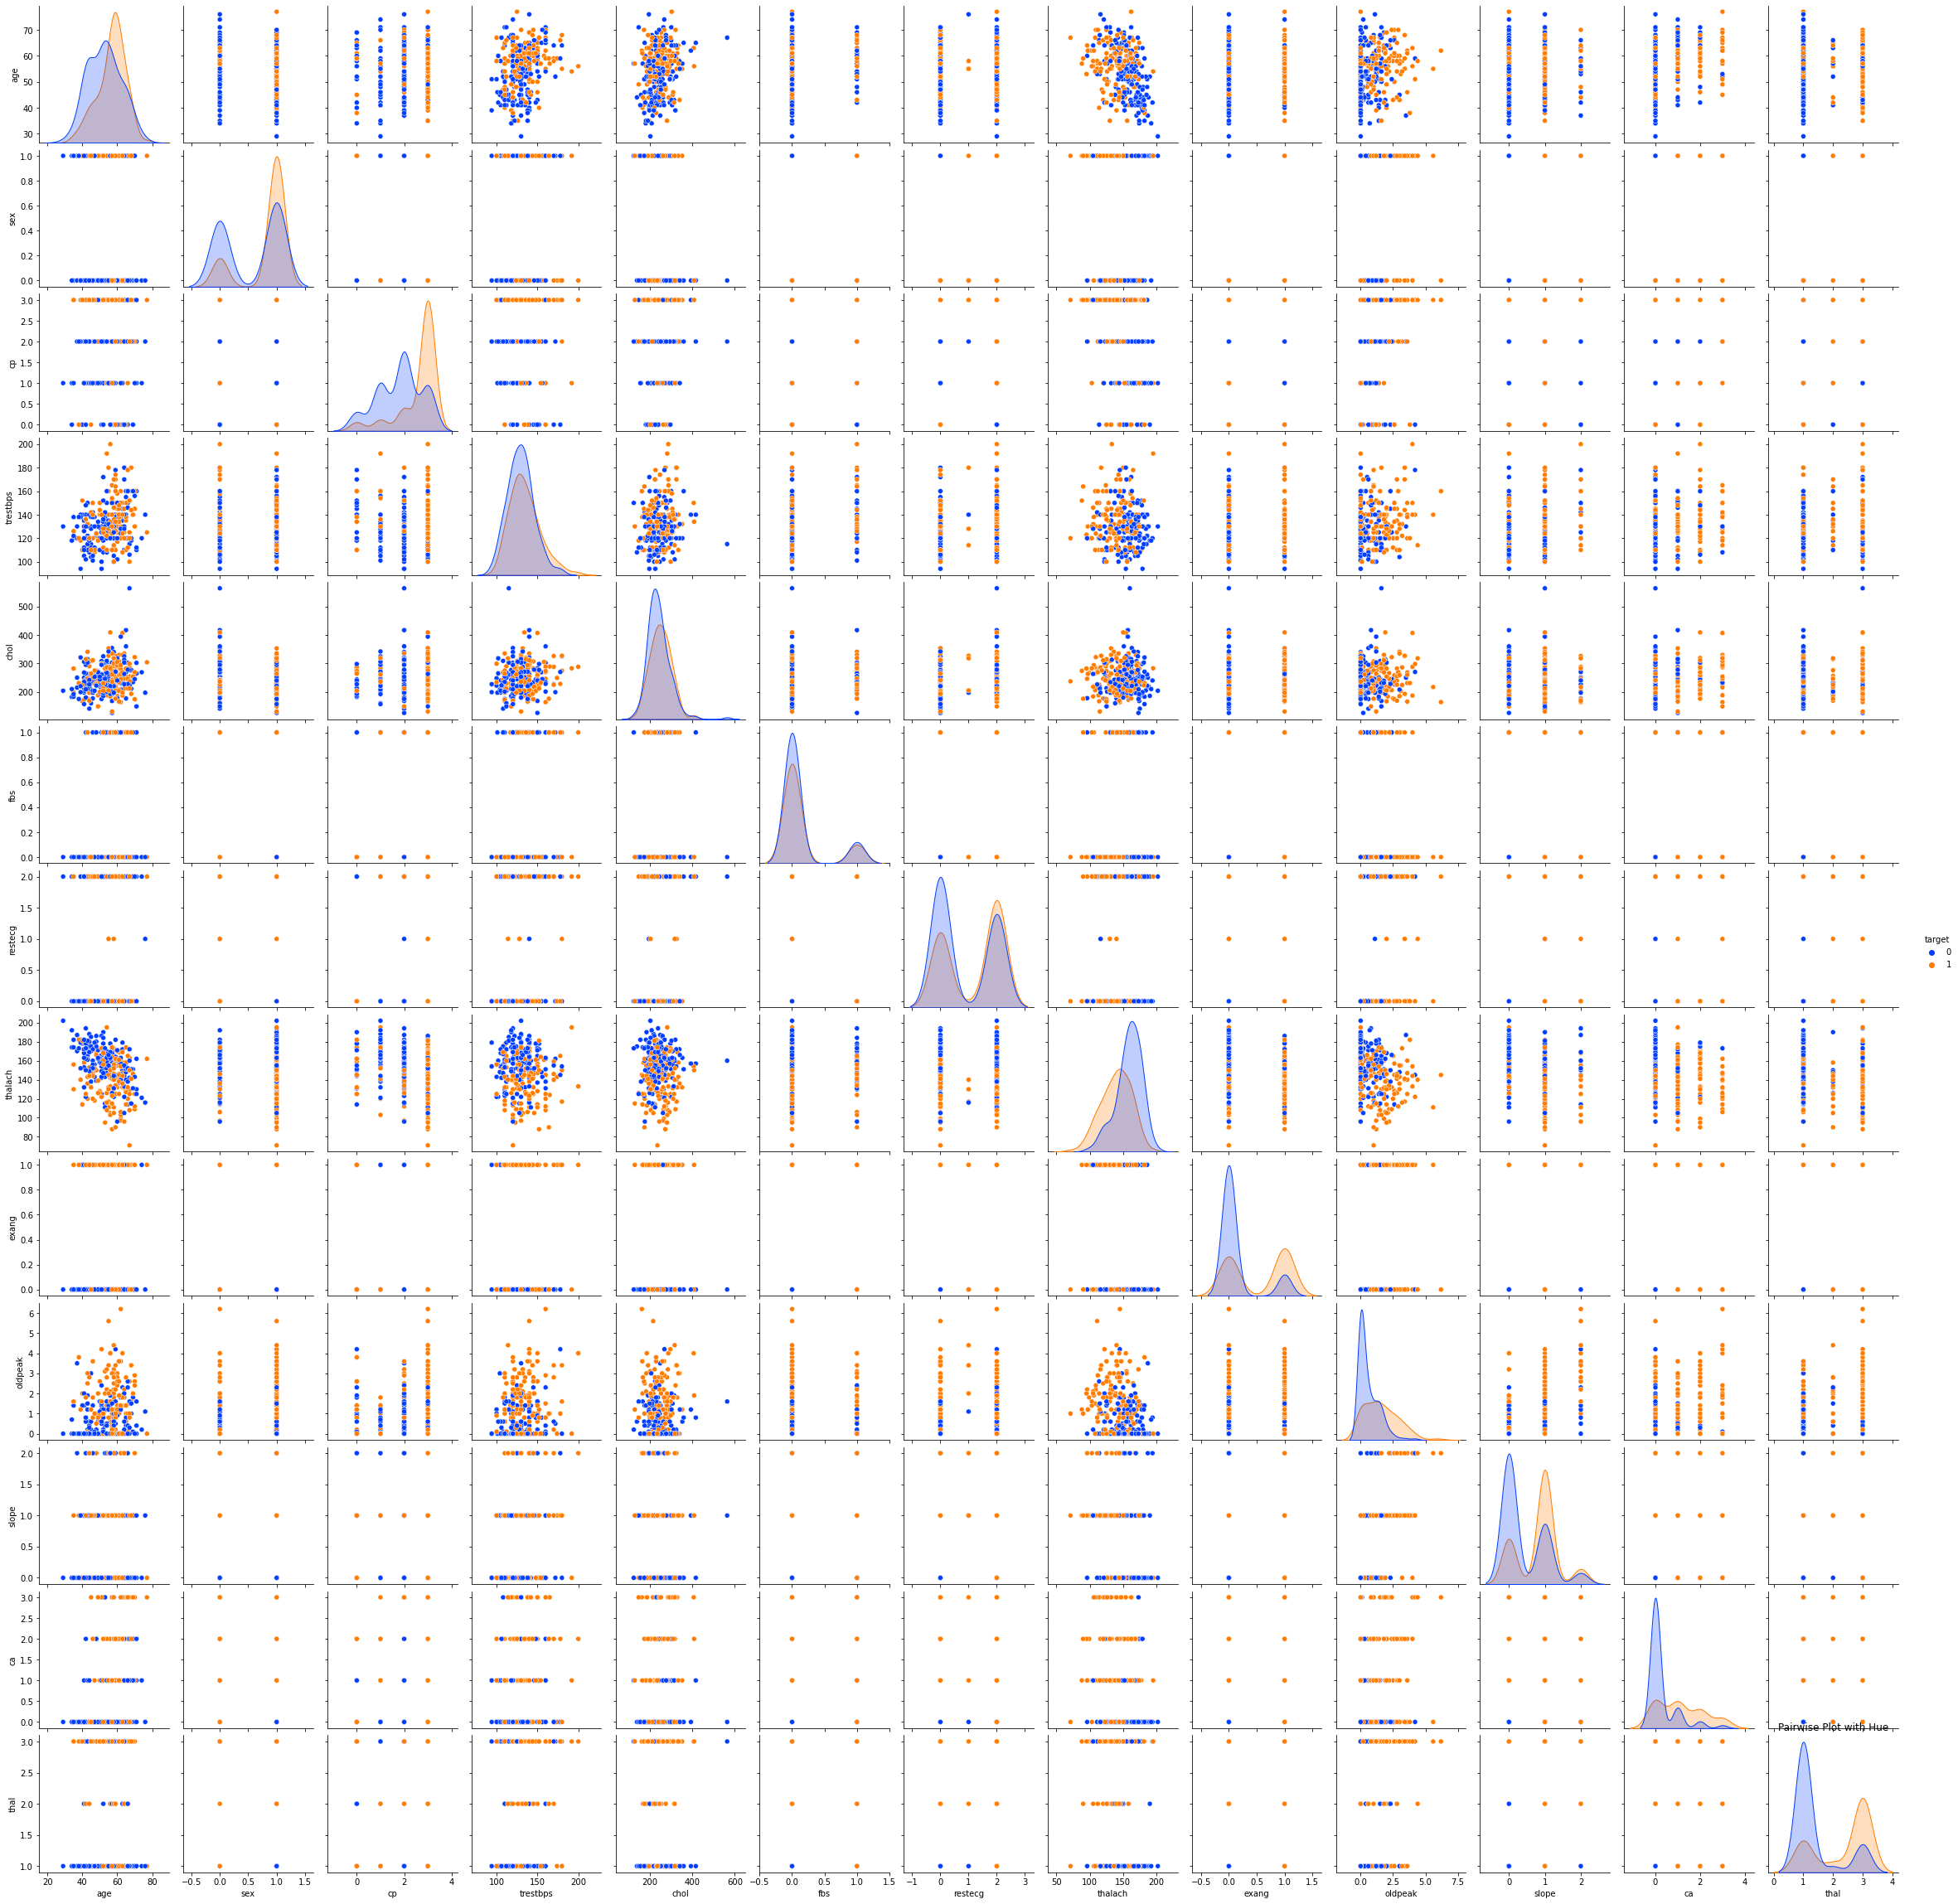

In [31]:
#10. Pairwise plot with hue for the target variable
sns.pairplot(df, hue='target', palette='bright')
plt.title('Pairwise Plot with Hue')
plt.show()

Analysis: The pairwise plot shows scatter plots and histograms for each feature pair, with color coding based on the target variable to reveal relationships and differences between target categories.
    
Interpretation: This plot helps identify relationships and patterns between features while distinguishing between different target categories (e.g., with and without heart disease). By comparing the scatter plots and histograms, you can see how features interact and how they differ across the target categories, which can be useful for feature selection and understanding the data's structure.

# Conclusion:

Analyzing the heart disease dataset reveals significant insights into the characteristics and risk factors associated with the condition. The distribution of cholesterol levels across different chest pain types highlights potential correlations and risk indicators. Correlation and pairwise plots provide a comprehensive view of how various features interact and can help identify important patterns or multicollinearity issues. The histograms and density plots offer a detailed understanding of the distribution of critical metrics such as cholesterol levels and maximum heart rate. Additionally, the count and bar plots illustrate how these features relate to the target variable, whether patients have heart disease or not. Collectively, these analyses aid in identifying key risk factors, understanding feature distributions, and guiding future research or predictive modeling efforts.

# Potential Implications for Predictive Modeling and Future Research

### Potential Implications for Predictive Modeling and Future Research

1. **Feature Selection and Engineering:**
   - **Key Risk Factors:** Insights from the analysis can guide the selection of important features, such as cholesterol levels and chest pain types, for predictive modeling. Features with strong correlations to heart disease can be prioritized, while redundant or less relevant features may be excluded.
   - **Interaction Effects:** Understanding feature interactions, revealed through pairwise plots, can lead to the creation of new features or transformations that capture complex relationships between variables.

2. **Model Development:**
   - **Improved Accuracy:** Identifying significant features and their distributions allows for the development of more accurate predictive models. Features that show strong associations with the target variable can enhance the model's ability to predict heart disease.
   - **Addressing Imbalances:** If certain classes (e.g., patients with heart disease) are underrepresented, techniques such as oversampling or weighted loss functions can be applied to address class imbalances in predictive models.

3. **Risk Assessment and Stratification:**
   - **Personalized Risk Profiles:** The analysis can aid in developing personalized risk assessment tools by combining multiple features to predict the likelihood of heart disease for individual patients.
   - **Preventive Measures:** Insights into key risk factors can inform preventive strategies and targeted interventions for high-risk groups based on their feature profiles.

4. **Future Research Directions:**
   - **Exploring Additional Features:** Future research could explore additional features or external datasets to refine models and uncover new risk factors.
   - **Longitudinal Studies:** Conducting longitudinal studies to track changes in features over time can provide deeper insights into how risk factors evolve and their long-term impact on heart disease.

Overall, these implications can enhance predictive modeling efforts and guide future research, ultimately contributing to better prevention, diagnosis, and treatment of heart disease.